In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

2024-05-31 19:47:36.447108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 19:47:36.637022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/rolling/opt/rviz_ogre_vendor/lib:/opt/ros/rolling/lib/x86_64-linux-gnu:/opt/ros/rolling/lib
2024-05-31 19:47:36.637042: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-31 19:47:36.672331: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for 

In [2]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [5]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [6]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [7]:
#data genaration, data augmentation
datagen = ImageDataGenerator(rotation_range=45)


In [8]:
#train_images = train_images[0:10]
#test_images = test_images[0:10]
#train_labels = train_labels[0:10]
#test_labels = test_labels[0:10]

In [9]:
generated_data = datagen.flow(train_images, train_labels, batch_size=1000)

In [10]:
batches = generated_data
print('number of batches: ', len(batches))
batch_0 = generated_data[0]
len(batch_0) #2: image, label
print('number of images: ', len(batch_0[0])) #images --> 10
print('number of labels: ', len(batch_0[1])) #labels --> 10

number of batches:  60
number of images:  1000
number of labels:  1000


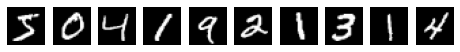

In [11]:
train_images_sample = train_images[0:10]
generated_data_sample = datagen.flow(train_images, train_labels, batch_size=10)

rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))

for i in range(1, 11):
    img = train_images_sample[i-1]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

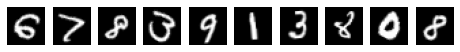

In [12]:
rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))

for i in range(1, 11):
    img = generated_data_sample[0][0][i-1]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [13]:
concatenated_train_images = np.concatenate((train_images,generated_data[0][0]), axis=0)
concatenated_train_labels = np.concatenate((train_labels, generated_data[0][1]), axis=0)

In [14]:
concatenated_train_images.shape

(61000, 28, 28, 1)

In [15]:
concatenated_train_labels.shape

(61000, 10)

In [16]:
from keras.models import Sequential
from keras import layers

In [17]:
model = Sequential()

#feature extractor
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', 
                        strides=(1, 1), input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())


model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', 
                        strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', 
                        strides=(1, 1)))

model.add(layers.MaxPool2D(pool_size=(2, 2)))

#classifier
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


2024-05-31 19:47:41.573315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/rolling/opt/rviz_ogre_vendor/lib:/opt/ros/rolling/lib/x86_64-linux-gnu:/opt/ros/rolling/lib
2024-05-31 19:47:41.573342: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-31 19:47:41.573361: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mhmud): /proc/driver/nvidia/version does not exist
2024-05-31 19:47:41.573606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(concatenated_train_images, concatenated_train_labels, validation_split=0.1,
          verbose=1, epochs=1, batch_size=32)

2024-05-31 19:47:41.738040: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172166400 exceeds 10% of free system memory.


1716/1716 [==============================] - 62s 36ms/step - loss: 0.1263 - accuracy: 0.9605 - val_loss: 0.1673 - val_accuracy: 0.9498


In [19]:
model.save('mnist_model_img_70000_eph_5.h5')

In [20]:
loaded_model = keras.models.load_model('mnist_model_img_70000_eph_5.h5')


In [ ]:
import cv2
test_img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img, cmap='gray')
test_img_resized =  cv2.resize(test_img, (28, 28))
test_img_flatten = test_img_resized.reshape(1, 28, 28, 1)
test_img_normalized = test_img_flatten.astype('float32')/255.

pred = loaded_model.predict(test_img_normalized)
prediced_label = np.argmax(pred)
prediced_label

1/1 [==============================] - 0s 209ms/step


1

In [ ]:
loaded_model.summary()

In [ ]:
for layer in loaded_model.layers:
    print(layer)

In [ ]:
feature_extractor = keras.models.Model(inputs=loaded_model.input, outputs=loaded_model.layers[-3].output)

In [ ]:
feature_extractor.summary()

In [ ]:
#Fine Tuning!
model1 = Sequential()
model1.add(feature_extractor)
model1.add(layers.Conv2D(528, (1, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(10, activation='softmax'))


In [ ]:
model1.summary()

In [ ]:
#Freezing the weights.
for layer in feature_extractor.layers:
    layer.trainable=False

    
#feature_extractor.trainable = False

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(concatenated_train_images, concatenated_train_labels, validation_split=0.1,
          verbose=1, epochs=1, batch_size=32)

In [ ]:
#resnet50
pretrained_model_resnet50_top_false = tf.keras.applications.ResNet50(include_top=False, input_shape=(32, 32, 3)
                                                          ,weights='imagenet')

In [ ]:
for layer in pretrained_model_resnet50_top_false.layers:
    layer.trainable=False

In [ ]:
pretrained_model_resnet50_top_false.summary()

In [ ]:
#resnet50
pretrained_model_resnet50_top_true = tf.keras.applications.ResNet50(include_top=True, input_shape=(224, 224, 3)
                                                          ,weights='imagenet')

In [ ]:
pretrained_model_resnet50_top_true.summary()

In [ ]:
#Fine Tuning!
model2 = Sequential()
model2.add(pretrained_model_resnet50_top_false)
model2.add(layers.Conv2D(528, (1, 1), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

In [ ]:
#resnet50
#vgg16 = tf.keras.applications.VGG16(include_top=False, input_shape=(32, 32, 3),weights='imagenet')